Baseline average: 0.29%
Monitoring average: 0.37%


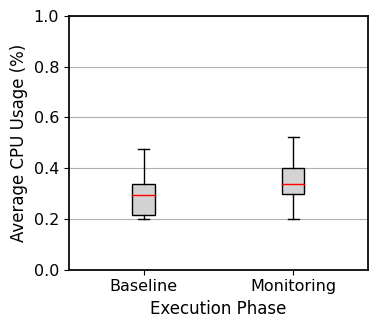

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

file_pattern = '00[1-9].csv'
file_list = glob.glob(file_pattern) + ['010.csv']

all_data = []

for file_path in file_list:
    data = pd.read_csv(
        file_path, 
        skiprows=2,
        delim_whitespace=True,
        names=["Time", "CPU", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]
    )
    
    cpu_data = data[data["CPU"] == "all"].copy()
    
    cpu_data["Seconds"] = range(len(cpu_data))
    
    cpu_data["%idle"] = pd.to_numeric(cpu_data["%idle"], errors="coerce")
    
    cpu_data["%CPU_Usage"] = 100 - cpu_data["%idle"]
    
    cpu_data["File"] = file_path
    
    all_data.append(cpu_data)

combined_data = pd.concat(all_data)

average_cpu_usage = combined_data.groupby("Seconds")["%CPU_Usage"].mean()

baseline = average_cpu_usage[average_cpu_usage.index < 10]
monitoring = average_cpu_usage[average_cpu_usage.index >= 10]

print(f"Baseline average: {baseline.mean():.2f}%")
print(f"Monitoring average: {monitoring.mean():.2f}%")

plt.figure(figsize=(4, 3.5))
comparison = [baseline, monitoring]
labels = ['Baseline', 'Monitoring']

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.25)

ax.yaxis.grid(True)
ax.xaxis.grid(False)

plt.rcParams.update({'font.size': 14})

plt.boxplot(comparison, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightgrey', color='black', linewidth=1),
            medianprops=dict(color='red', linewidth=1),
            flierprops=dict(marker='', color='black', alpha=0.25))
plt.ylim(0, 1)
plt.ylabel('Average CPU Usage (%)', fontsize=12)
plt.xlabel('Execution Phase', fontsize=12)
plt.xticks(fontsize=11.5)
plt.yticks(fontsize=11.5)
plt.tight_layout()

plt.savefig('average_cpu_comparison_v7.pdf', dpi=1000)
plt.show()


Baseline average: 0.29%
Monitoring average: 0.35%


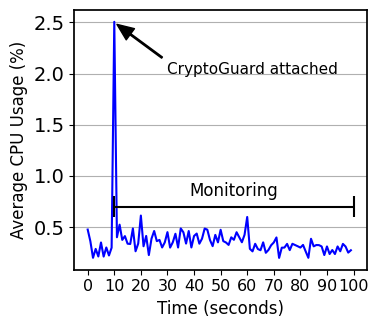

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

file_pattern = '00[1-9].csv'
file_list = glob.glob(file_pattern) + ['010.csv'] 

all_data = []

for file_path in file_list:
    data = pd.read_csv(
        file_path, 
        skiprows=2,  
        delim_whitespace=True, 
        names=["Time", "CPU", "%usr", "%nice", "%sys", "%iowait", "%irq", "%soft", "%steal", "%guest", "%gnice", "%idle"]
    )
    
    cpu_data = data[data["CPU"] == "all"].copy()
    
    cpu_data["Seconds"] = range(len(cpu_data))
    
    cpu_data["%idle"] = pd.to_numeric(cpu_data["%idle"], errors="coerce")
    
    cpu_data["%CPU_Usage"] = 100 - cpu_data["%idle"]

    all_data.append(cpu_data)

combined_data = pd.concat(all_data)

average_cpu_usage = combined_data.groupby("Seconds")["%CPU_Usage"].mean()

baseline_avg = average_cpu_usage[average_cpu_usage.index < 10].mean()
program_run_avg = average_cpu_usage[average_cpu_usage.index > 10].mean()
print(f"Baseline average: {baseline_avg:.2f}%")
print(f"Monitoring average: {program_run_avg:.2f}%")

plt.figure(figsize=(4, 3.5))
plt.plot(average_cpu_usage.index, average_cpu_usage.values, color='blue')

plt.annotate('CryptoGuard attached', xy=(10, 2.5), xytext=(30, 2),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=10),
             horizontalalignment='left', fontsize=11)

plt.hlines(y=0.7, xmin=10, xmax=100, color='black', linestyle='-', linewidth=1.5)
plt.text(55, 0.8, 'Monitoring', color='black', fontsize=12, horizontalalignment='center')
plt.vlines(x=10, ymin=0.6, ymax=0.8, color='black', linewidth=1.5)
plt.vlines(x=100, ymin=0.6, ymax=0.8, color='black', linewidth=1.5)


plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Average CPU Usage (%)', fontsize=12)

plt.xticks(range(0, 101, 10), fontsize=11.5)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(1.25)

ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('cpu_variation_v5.pdf', dpi=1000)
plt.show()